<center><h1>Exploratory Data Analysis</h1></center>
<hr>

### Table of Contents <a id="top"></a>
1. [Environment Setting](#1)
2. [Load Dataset](#2)
3. [Basic EDA: train.csv + test.csv](#3)
    1. [column 1: source_system_tab](#3.1)
    2. [column 2: source_type](#3.2)
    3. [column 3: source_screen_name](#3.3)
4. [Basic EDA: train.csv](#4)
    1. [column 1: source_system_tab](#4.1)
    2. [column 2: source_type](#4.2)
    3. [column 3: source_screen_name](#4.3)
5. [Process train.csv + test.csv](#5)
    1. [column 1: source_system_tab](#5.1)
    2. [column 2: source_type](#5.2)
    3. [column 3: source_screen_name](#5.3)
    4. [Save Processed Dataframe](#5.4)
6. [Basic EDA: members.csv](#6)
    1. [column 1: city](#6.1)
    2. [column 2: bd](#6.2)
    3. [column 3: gender](#6.3)
    4. [column 4: registered_via](#6.4)
    5. [column 5: registration_init_time](#6.5)
    6. [column 6: registration_init_time](#6.6)
    7. [Save Processed Dataframe](#6.7)
7. [EDA: members.csv + train.csv](#7)
    1. [column 1: city](#7.1)
    2. [column 2: bd](#7.2)
    3. [column 3: gender](#7.3)
    4. [column 4: registered_via](#7.4)
    5. [column 5: registration_init_time_year](#7.5)
    6. [column 6: expiration_date_year](#7.6)
8. [Basic EDA: songs.csv](#8)
    1. [column 1: song_length](#8.1) 
    2. [column 2: genre_ids](#8.2)
    3. [column 3: artist_name](#8.3)
    4. [column 4: composer](#8.4)
    5. [column 5: lyricist](#8.5)
    6. [column 6: language](#8.6)
9. [EDA: songs.csv + train.csv](#9)
    1. [column 1: song_length](#9.1)
    2. [column 2: genre_id(s)](#9.2)
    3. [column 3: language](#9.3)
10. [Imputation on songs.csv](#10)
    1. [column langauge](#10.1)
11. [save processed dataset](#11)
    1. [processed members](#11.1)
    2. [processed songs](#11.2)
    3. [processed train and test](#11.3)

<hr>

### Environment Setting <a id="1"></a>

In [1]:
# For Visualization
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# For Dataframe Processing
import pandas as pd

# For-Loop Visualizatiton
from tqdm import tqdm

# Numerical Data
import numpy as np

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [3]:
sns.set_style('darkgrid')

In [4]:
fname = '../static/fonts/D2Coding.ttc'
font_family = fm.FontProperties(fname=fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 16

<hr>

### Load Dataset <a id="2"></a>

In [13]:
train_raw = pd.read_csv('../data/train.csv')
test_raw = pd.read_csv('../data/test.csv')
sample_submission_raw = pd.read_csv('../data/sample_submission.csv')
songs_raw = pd.read_csv('../data/songs.csv')
members_raw = pd.read_csv('../data/members.csv')
song_extra_info_raw = pd.read_csv('../data/song_extra_info.csv')

In [6]:
train_raw

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [7]:
test_raw

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [14]:
sample_submission_raw

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


In [8]:
songs_raw

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [9]:
members_raw

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [10]:
song_extra_info_raw

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


<hr>

### Basic EDA: train.csv + test.csv <a id="3"></a>

1. source_system_tab: **my library** > **discover** > search > radio > listen with > explore > notification > settings
2. source_type: **local-library** > **online-playlist** > **local-playlist** > radio > album > top-hits-for-artist > song > song-based-playlist > listen-with > topic-article-playlist > artist > my-daily-playlist
3. source_screen_name: **Local playlist more** > **Online playlist more** > **Radio** > **Album more** > Search > Artist more > Discover Feature > Discover Chart > Others profile more > Discover Genre > My library > Explore > Unknown > Discover New > Search Trends > Search Home > My library_Search > Self profile more > Concert > Payment > People local > People global

In [11]:
train_test_raw = pd.concat([train_raw, test_raw], axis=0, join='inner', ignore_index=True)
train_test_raw

,msno,song_id,source_system_tab,source_screen_name,source_type
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist
...,...,...,...,...,...
9934203,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
9934204,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
9934205,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
9934206,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [12]:
train_test_raw.describe(include='all')

,msno,song_id,source_system_tab,source_screen_name,source_type
count,9934208,9934208,9900917,9356521,9905372
unique,34403,419839,8,22,12
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library
freq,7894,16019,4704222,4073317,2843745


In [13]:
train_test_raw.isna().sum()

msno                       0
song_id                    0
source_system_tab      33291
source_screen_name    577687
source_type            28836
dtype: int64

### column 1: source_system_tab <a id="3.1"></a>

In [14]:
column = 'source_system_tab'

In [15]:
train_test_raw[column].value_counts()

my library      4704222
discover        3050320
search           900901
radio            689466
listen with      310894
explore          233972
notification       8309
settings           2833
Name: source_system_tab, dtype: int64

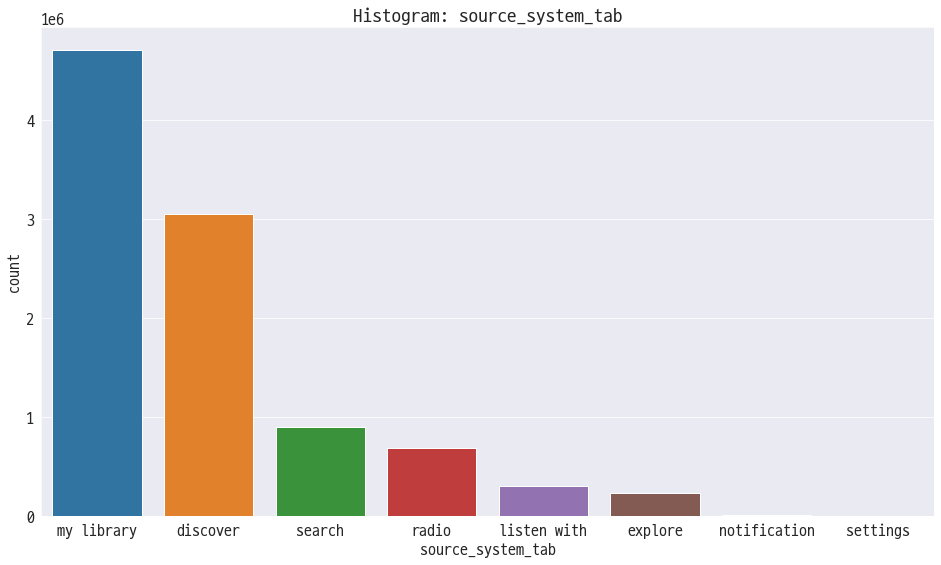

In [16]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

### column 2: source_type <a id="3.2"></a>

In [17]:
column = 'source_type'

In [18]:
train_test_raw[column].value_counts()

local-library             2843745
online-playlist           2742456
local-playlist            1374040
radio                      698273
album                      672534
top-hits-for-artist        602974
song                       373875
song-based-playlist        297706
listen-with                277341
topic-article-playlist      16276
artist                       3466
my-daily-playlist            2686
Name: source_type, dtype: int64

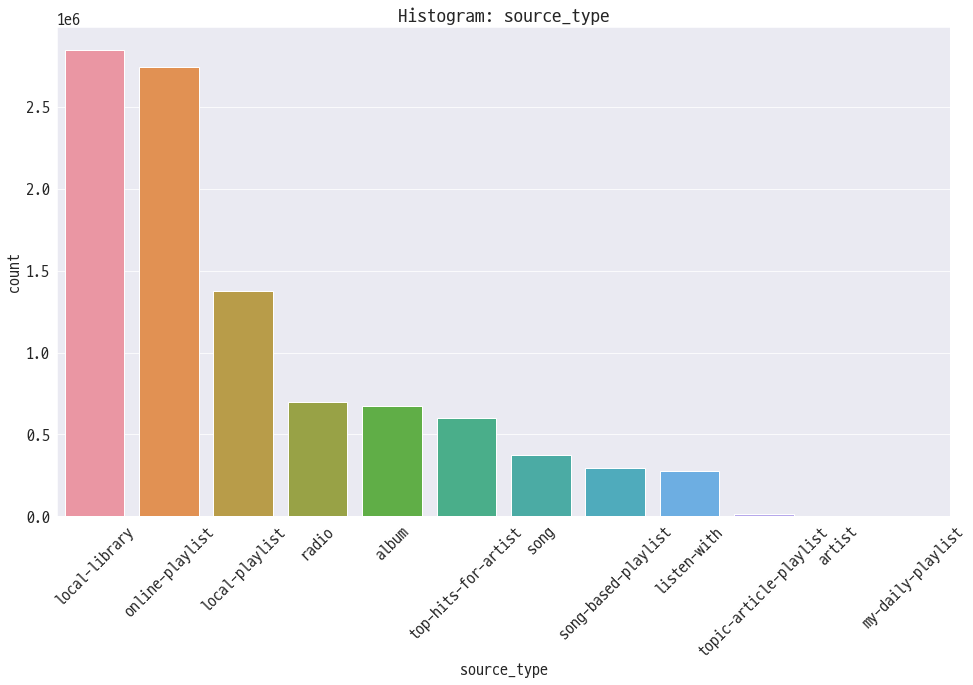

In [19]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.xticks(rotation=45)
plt.show()

### column 3: source_screen_name <a id="3.3"></a>

In [20]:
column = 'source_screen_name'

In [21]:
train_test_raw[column].value_counts()

Local playlist more     4073317
Online playlist more    1824496
Radio                    685668
Album more               596285
Search                   420469
Artist more              363428
Discover Feature         337647
Discover Chart           292657
Others profile more      292252
Discover Genre           123819
My library               101539
Explore                  100214
Unknown                   77790
Discover New              21232
Search Trends             18515
Search Home               18187
My library_Search          8565
Self profile more           343
Concert                      60
Payment                      24
People local                 13
People global                 1
Name: source_screen_name, dtype: int64

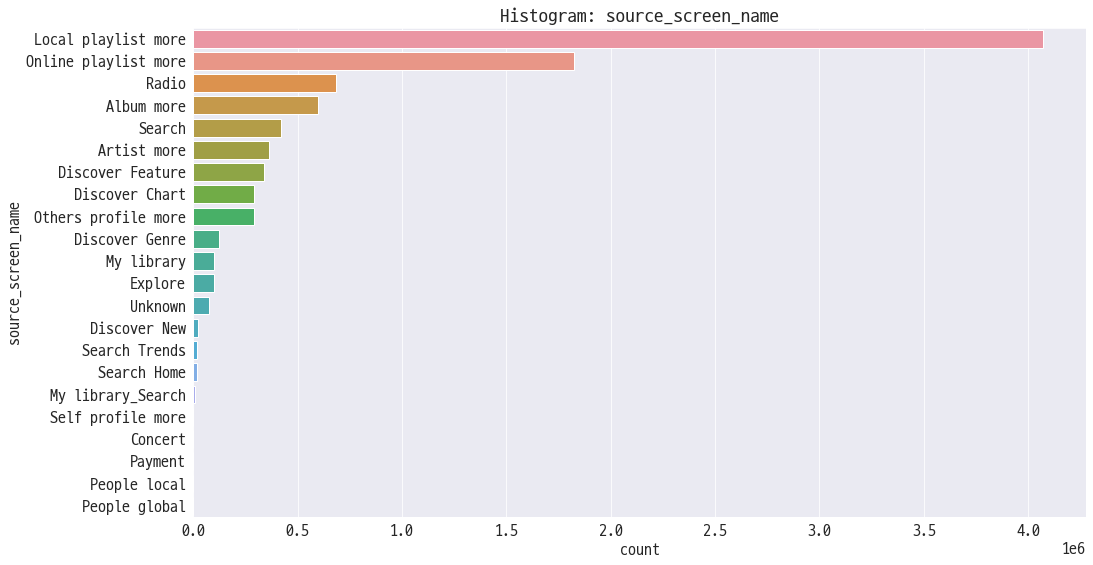

In [22]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_test_raw, order=train_test_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

<hr>

### Basic EDA: train.csv <a id="4"></a>

1. source_system_tab: **(target=1)** my library **(target=0)** discover, radio
2. source_type: **(target=1)** local-library, local-playlist **(target=0)** online-playlist, radio
3. source_screen_name: **(target=1)** Local playlist more **(target=0)** Online playlist more , Radio 

### column 1: source_system_tab <a id="4.1"><a/>

In [23]:
column = 'source_system_tab'

In [24]:
train_raw.groupby('target')[column].value_counts()

target  source_system_tab
0       my library           1401454
        discover             1273185
        radio                 370558
        search                360657
        listen with           142944
        explore                97050
        notification            3847
        settings                 900
1       my library           2283276
        discover              906067
        search                262629
        radio                 106143
        explore                70899
        listen with            69322
        notification            2338
        settings                1300
Name: source_system_tab, dtype: int64

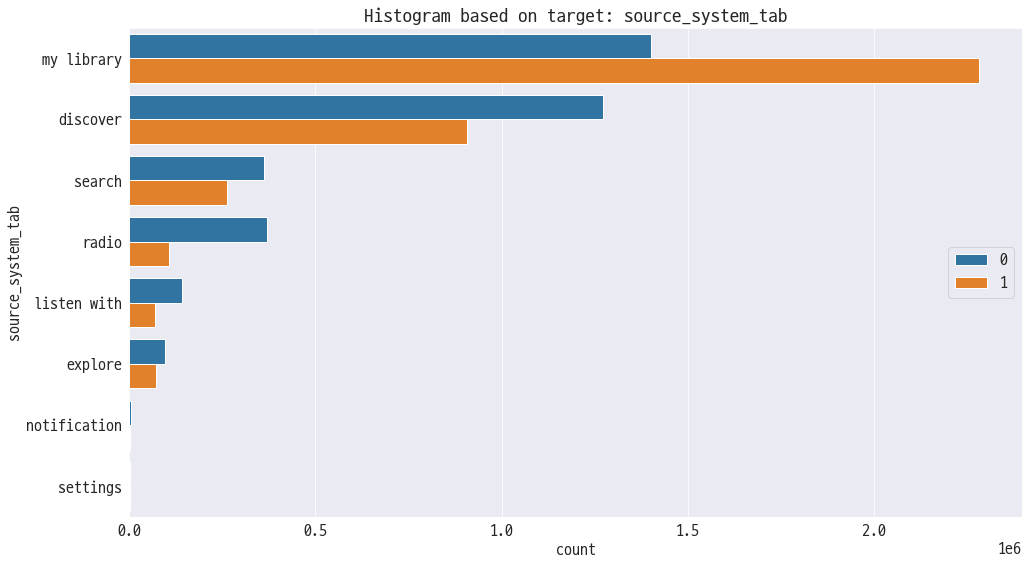

In [25]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.title('Histogram based on target: {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 2: source_type <a id="4.2"></a>

In [26]:
column = 'source_type'

In [27]:
train_raw.groupby('target')[column].value_counts()

target  source_type           
0       online-playlist           1131585
        local-library              831973
        radio                      376953
        local-playlist             369493
        album                      289547
        top-hits-for-artist        246316
        song                       137666
        listen-with                131200
        song-based-playlist        130430
        topic-article-playlist       5661
        artist                       1298
        my-daily-playlist             414
1       local-library             1429426
        online-playlist            836339
        local-playlist             710010
        album                      187797
        top-hits-for-artist        177298
        song                       107056
        radio                      106156
        song-based-playlist         80097
        listen-with                 61642
        topic-article-playlist       5533
        artist                       1740
   

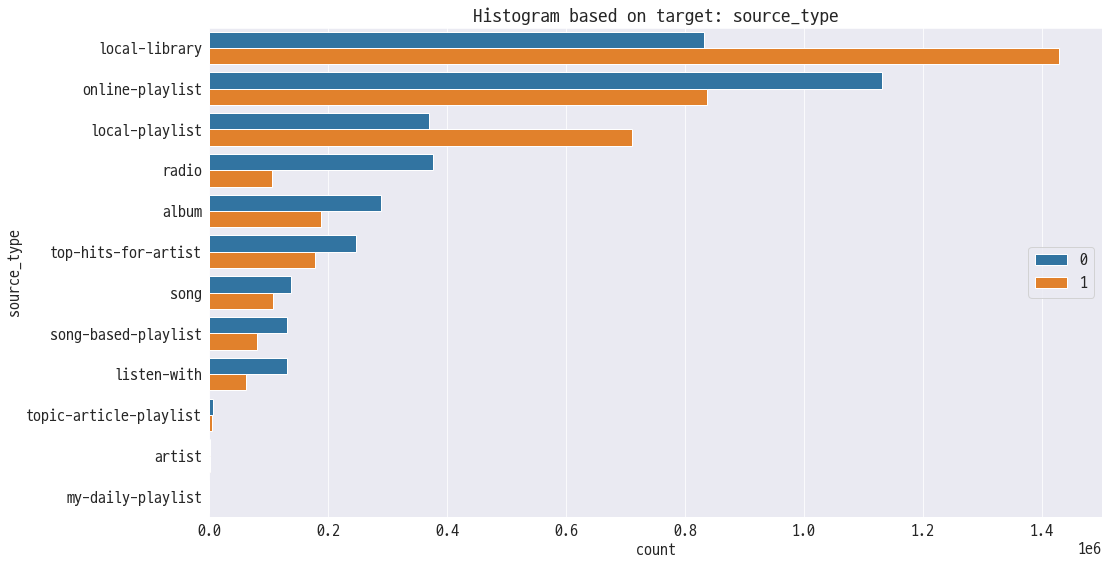

In [28]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.title('Histogram based on target: {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 3: source_screen_name <a id="4.3"></a>

In [29]:
column = 'source_screen_name'

In [30]:
train_raw.groupby('target')[column].value_counts()

target  source_screen_name  
0       Local playlist more     1171891
        Online playlist more     757472
        Radio                    371386
        Album more               256063
        Search                   157676
        Discover Feature         155315
        Artist more              147202
        Others profile more      138708
        Discover Chart           103190
        Discover Genre            53605
        Explore                   39922
        Unknown                   35798
        My library                26048
        Search Home                8715
        Discover New               8687
        Search Trends              8493
        My library_Search          2508
        Self profile more           122
        Concert                      23
        Payment                       4
1       Local playlist more     2056311
        Online playlist more     537217
        Album more               164093
        Search                   140811
        Dis

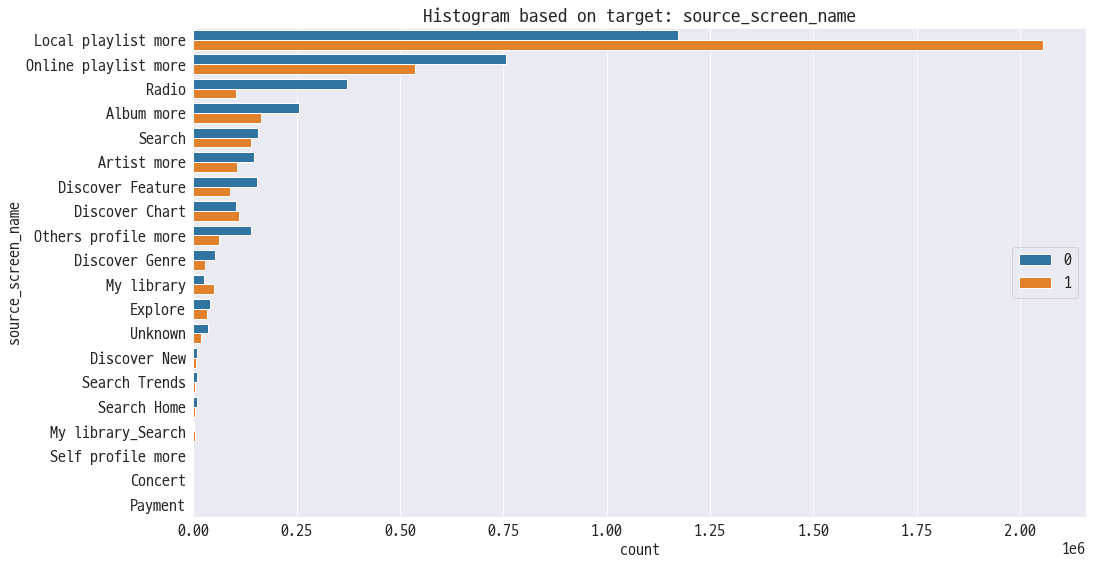

In [31]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=train_raw, order=train_raw[column].value_counts().index, hue='target')
plt.legend(loc='center right')
plt.title('Histogram based on target: {}'.format(column))
plt.show()

<hr>

### Process train.csv + test.csv <a id="5"></a>

1. source_system_tab: 0: else | 1: my library | 2: discover | 3: radio
2. source_type: 0: else | 1: local-library | 2: local-playlist | 3: online-playlist | 4: radio
3. source_screen_name: 0: else | 1: Local playlist more | 2: Online playlist more | 3: Radio 

In [32]:
train_proc = train_raw.copy()
test_proc = test_raw.copy()

### column 1: source_system_tab <a id="5.1"></a>

In [33]:
source_system_tab_list = ['my library', 'discover', 'radio']

In [34]:
column = 'source_system_tab'

In [35]:
train_proc.loc[~train_proc[column].isin(source_system_tab_list), column] = 'REMOVED'
train_proc[column].value_counts()

my library    3684730
discover      2179252
REMOVED       1036735
radio          476701
Name: source_system_tab, dtype: int64

In [36]:
test_proc.loc[~test_proc[column].isin(source_system_tab_list), column] = 'REMOVED'
test_proc[column].value_counts()

my library    1019492
discover       871068
REMOVED        453465
radio          212765
Name: source_system_tab, dtype: int64

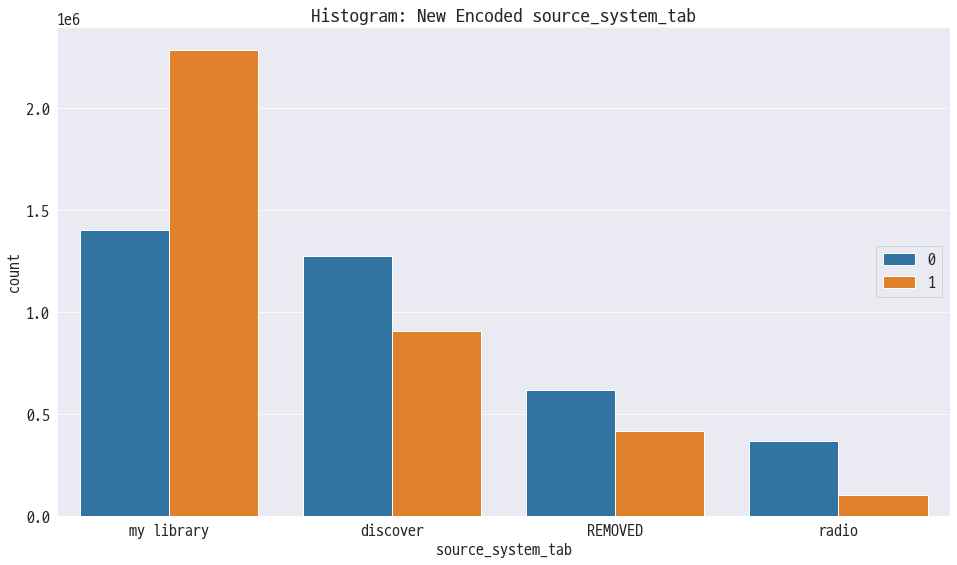

In [37]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 2: source_type <a id="5.2"></a>

In [38]:
source_type_list = ['local-library', 'local-playlist', 'online-playlist', 'radio']

In [39]:
column = 'source_type'

In [40]:
train_proc.loc[~train_proc[column].isin(source_type_list), column] = 'REMOVED'
train_proc[column].value_counts()

local-library      2261399
online-playlist    1967924
REMOVED            1585483
local-playlist     1079503
radio               483109
Name: source_type, dtype: int64

In [41]:
test_proc.loc[~test_proc[column].isin(source_type_list), column] = 'REMOVED'
test_proc[column].value_counts()

online-playlist    774532
REMOVED            690211
local-library      582346
local-playlist     294537
radio              215164
Name: source_type, dtype: int64

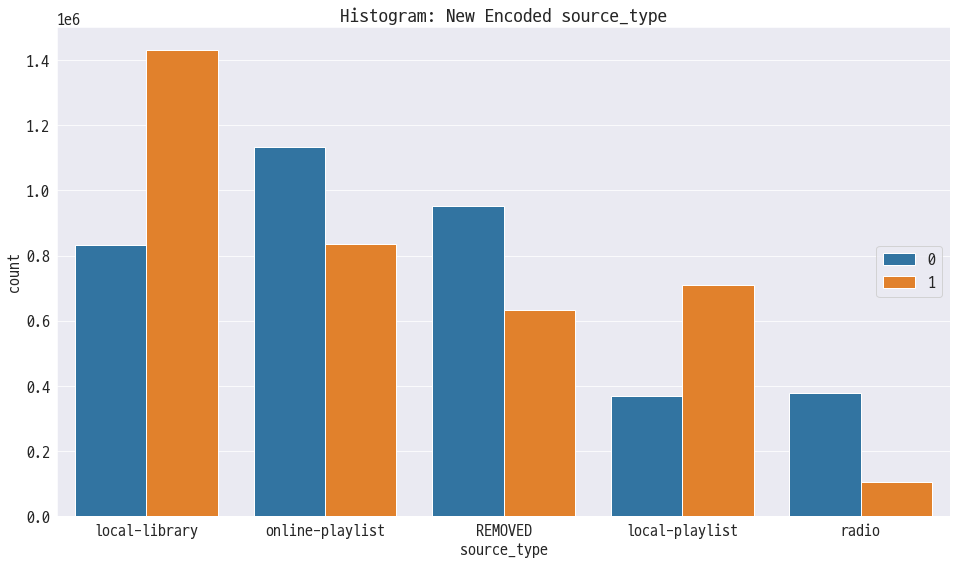

In [42]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### column 3: source_screen_name <a id="5.3"></a>

In [43]:
source_screen_name_list = ['Local playlist more', 'Online playlist more', 'Radio']

In [44]:
column = 'source_screen_name'

In [45]:
train_proc.loc[~train_proc[column].isin(source_screen_name_list), column] = 'REMOVED'
train_proc[column].value_counts()

Local playlist more     3228202
REMOVED                 2380060
Online playlist more    1294689
Radio                    474467
Name: source_screen_name, dtype: int64

In [46]:
test_proc.loc[~test_proc[column].isin(source_screen_name_list), column] = 'REMOVED'
test_proc[column].value_counts()

REMOVED                 970667
Local playlist more     845115
Online playlist more    529807
Radio                   211201
Name: source_screen_name, dtype: int64

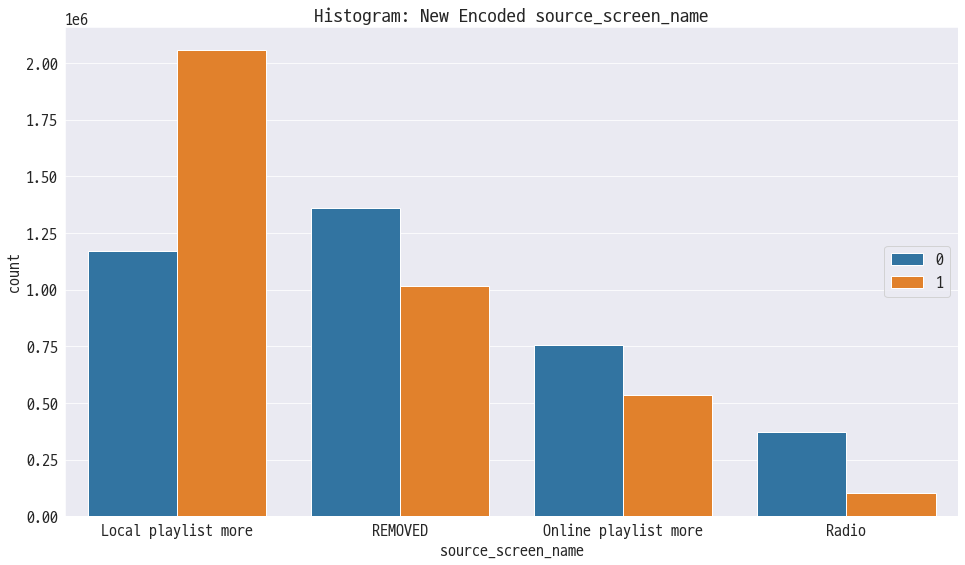

In [47]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=train_proc, order=train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: New Encoded {}'.format(column))
plt.legend(loc='center right')
plt.show()

### Save Processed Dataframe <a id="5.4"></a>

In [48]:
train_proc.to_csv('../data/processed/train.csv', index=False)
test_proc.to_csv('../data/processed/test.csv', index=False)

<hr>

### Basic EDA: members.csv <a id="6"></a>

In [49]:
members_raw.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,34403,34403.000000,34403.000000,14501,34403.000000,3.440300e+04,3.440300e+04
unique,34403,NaN,NaN,2,NaN,NaN,NaN
top,IYUhHc1I7I7/rg3z4EQMEkKY3uOTFNZJAZg6PUiORwQ=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,7405,NaN,NaN,NaN
mean,NaN,5.371276,12.280935,NaN,5.953376,2.013994e+07,2.016901e+07
std,NaN,6.243929,18.170251,NaN,2.287534,2.954015e+04,7.320925e+03
min,NaN,1.000000,-43.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,0.000000,NaN,4.000000,2.012103e+07,2.017020e+07
50%,NaN,1.000000,0.000000,NaN,7.000000,2.015090e+07,2.017091e+07
75%,NaN,10.000000,25.000000,NaN,9.000000,2.016110e+07,2.017093e+07


In [50]:
members_raw.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### column 1: city <a id="6.1"></a>

In [51]:
column = 'city'

In [52]:
members_raw[column].value_counts()

1     19445
13     3395
5      2634
4      1732
15     1525
22     1467
6       913
14      708
12      491
9       309
8       289
11      285
18      259
10      216
21      213
3       204
17      152
7        93
16       35
20       27
19       11
Name: city, dtype: int64

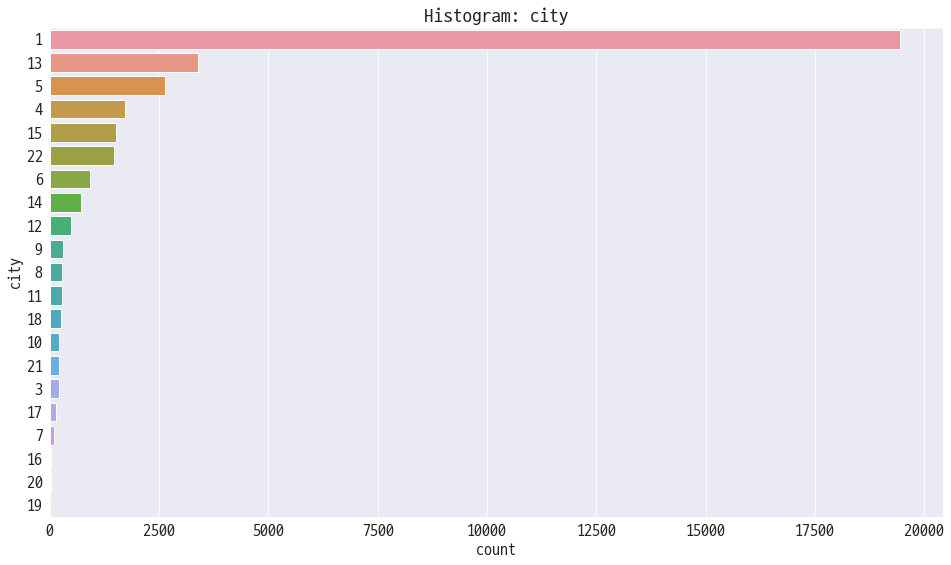

In [53]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=members_raw, order=members_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

### column 2: bd <a id="6.2"></a>

bd is age data. But has outlier values.

In [54]:
column = 'bd'

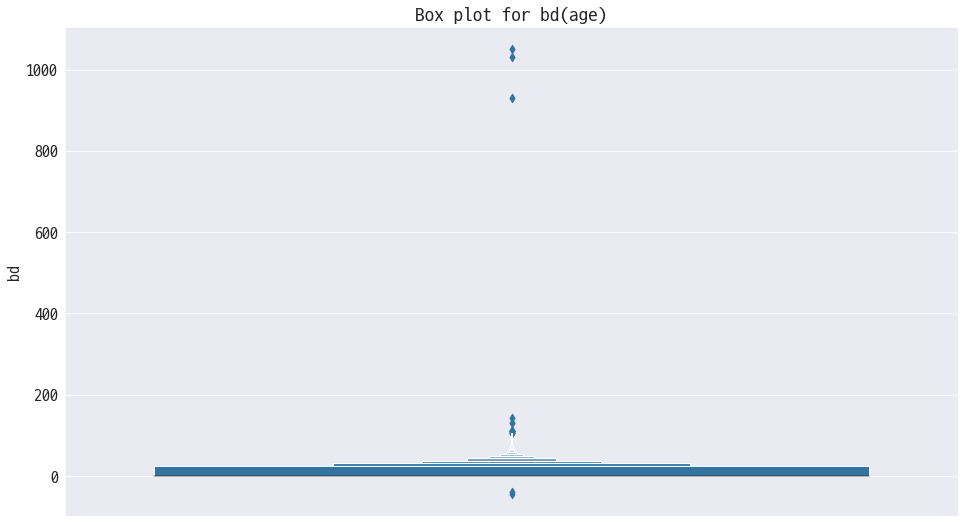

In [55]:
plt.figure(figsize=(16, 9))
sns.boxenplot(y=column, data=members_raw)
plt.title('Box plot for {}(age)'.format(column))
plt.show()

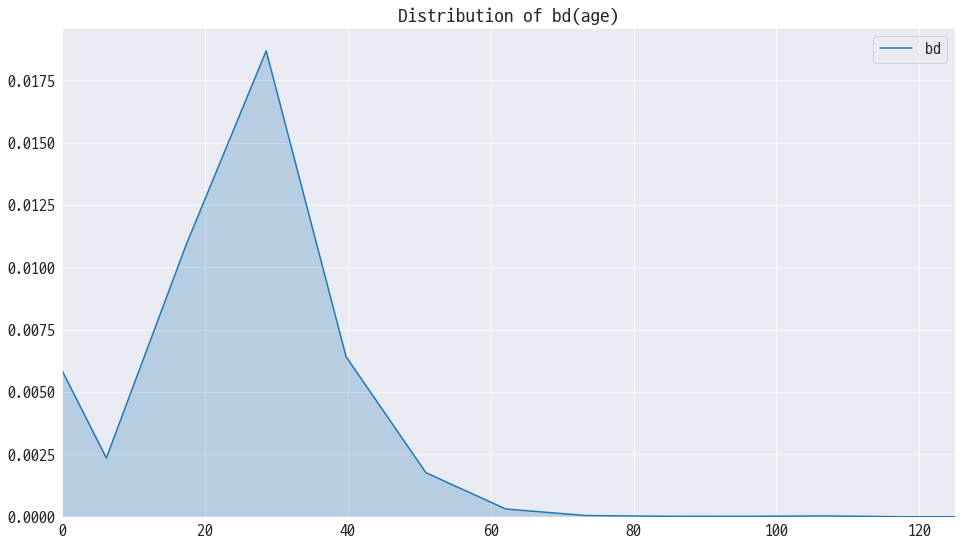

In [56]:
plt.figure(figsize=(16, 9))
sns.kdeplot(members_raw[column], shade=True)
plt.title('Distribution of {}(age)'.format(column))
plt.xlim([0, 125])
plt.show()

### column 3: gender <a id="6.3"></a>

In [57]:
column = 'gender'

In [58]:
members_raw[column].value_counts(dropna=False)

NaN       19902
male       7405
female     7096
Name: gender, dtype: int64

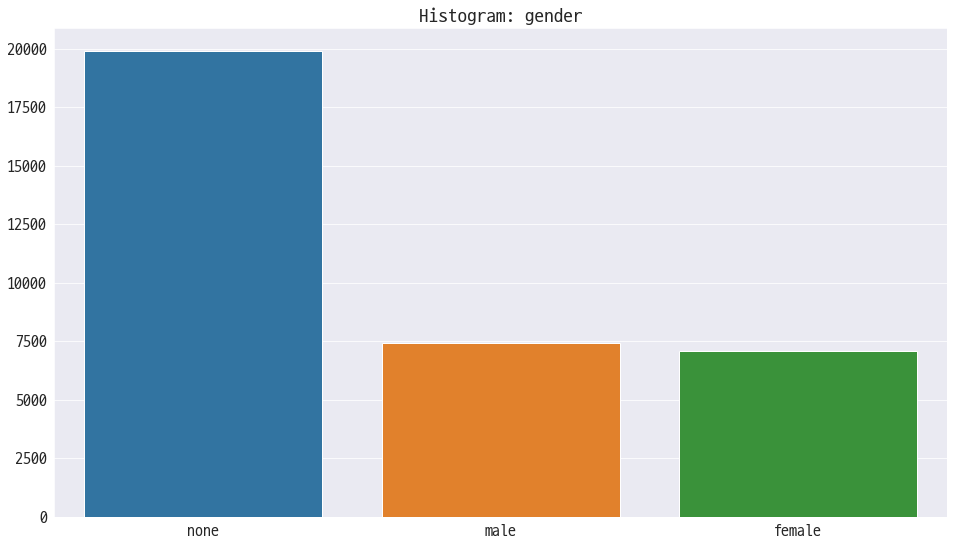

In [59]:
gender_counts = members_raw[column].value_counts(dropna=False)
index = gender_counts.index.to_list()
index[0] = 'none'

plt.figure(figsize=(16, 9))
sns.barplot(index, gender_counts.values)
plt.title('Histogram: {}'.format(column))
plt.show()

### column 4: registered_via <a id="6.4"></a>

In [60]:
column = 'registered_via'

In [61]:
members_raw[column].value_counts()

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

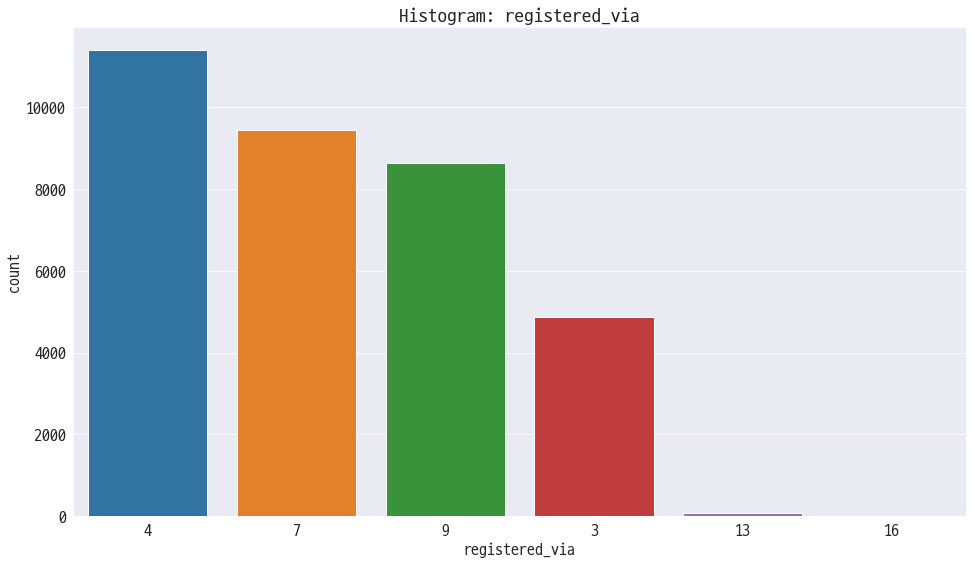

In [62]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=members_raw, order=members_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

### column 5: registration_init_time <a id="6.5"></a>

In [63]:
members_proc = members_raw.copy()

In [64]:
column = 'registration_init_time'

In [65]:
members_proc[column] = members_proc[column].astype('str')

In [66]:
members_proc[column+'_year'] = members_proc[column].str.slice(0, 4)
members_proc[column+'_month'] = members_proc[column].str.slice(4, 6)
members_proc[column+'_day'] = members_proc[column].str.slice(6, 8)

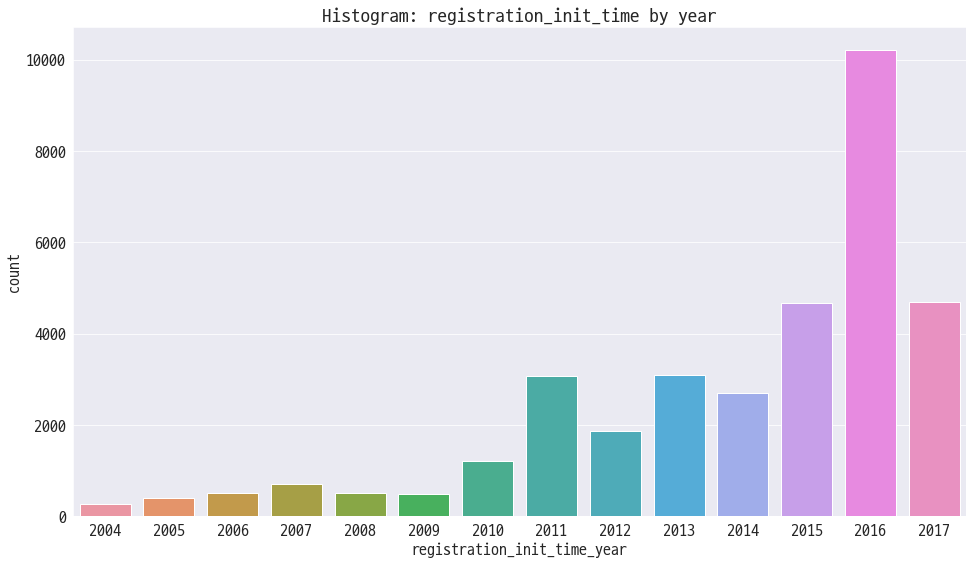

In [67]:
plt.figure(figsize=(16, 9))
sns.countplot(column + '_year', data=members_proc)
plt.title('Histogram: {} by year'.format(column))
plt.show()

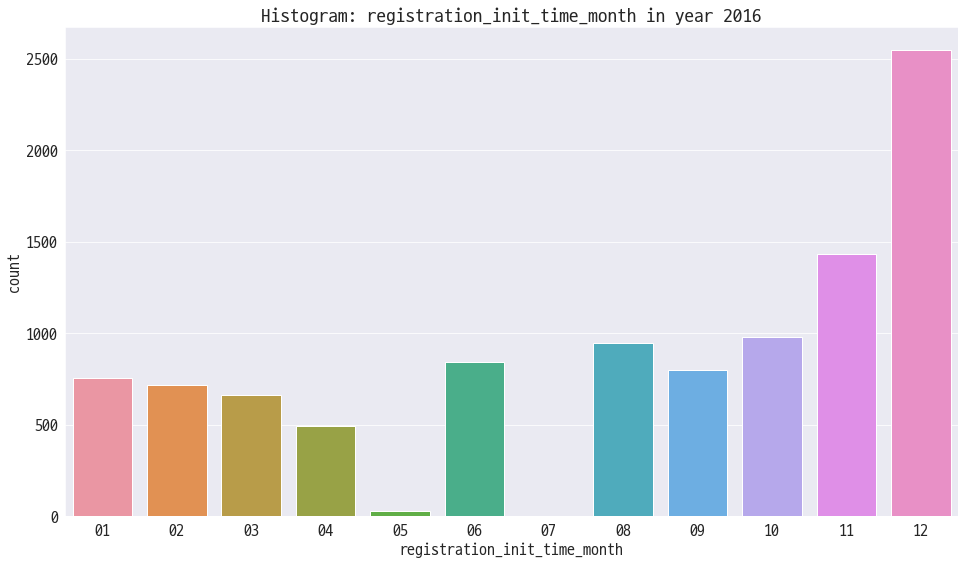

In [68]:
year = 2016
plt.figure(figsize=(16, 9))
sns.countplot(column + '_month', data=members_proc[members_proc[column+'_year'] == str(year)])
plt.title('Histogram: {} in year {}'.format(column + '_month', year))
plt.show()

### column 6: registration_init_time <a id="6.6"></a>

In [69]:
column = 'expiration_date'

In [70]:
members_proc[column] = members_proc[column].astype('str')

In [71]:
members_proc[column + '_year'] = members_proc[column].str.slice(0, 4)
members_proc[column + '_month'] = members_proc[column].str.slice(4, 6)
members_proc[column + '_day'] = members_proc[column].str.slice(6, 8)

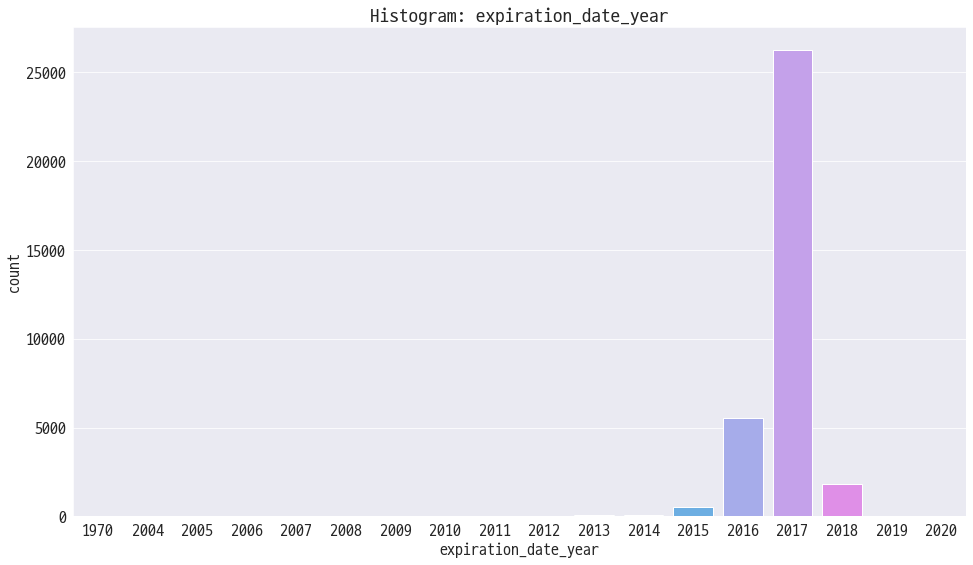

In [72]:
plt.figure(figsize=(16, 9))
sns.countplot(column + '_year', data=members_proc)
plt.title('Histogram: {}'.format(column + '_year'))
plt.show()

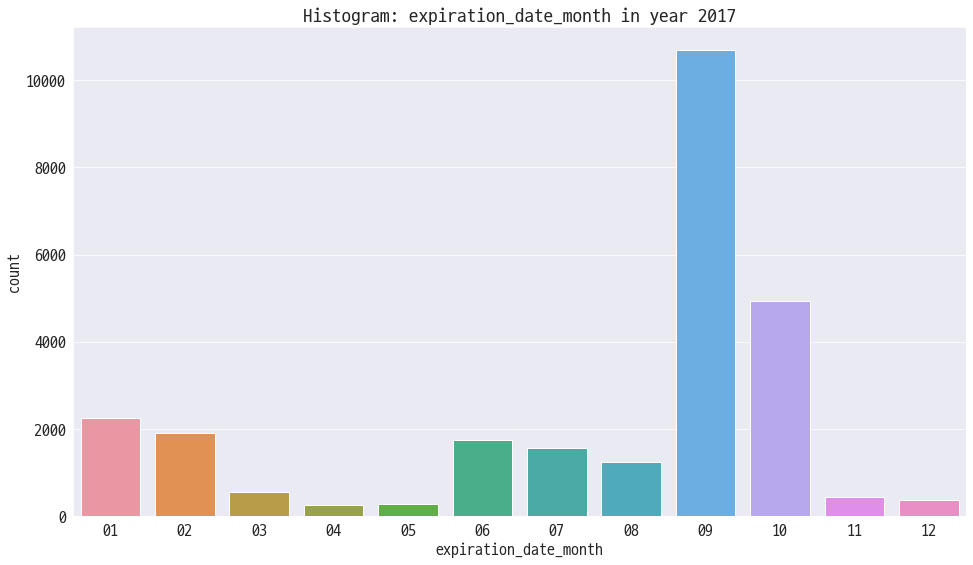

In [73]:
year = 2017
plt.figure(figsize=(16, 9))
sns.countplot(column + '_month' , data=members_proc[members_proc[column + '_year'] == str(year)])
plt.title('Histogram: {} in year {}'.format(column + '_month', year))
plt.show()

### Save Processed Dataframe <a id="6.7"></a>

In [74]:
members_proc.to_csv('../data/processed/members.csv', index=False)

<hr>

### EDA: members.csv + train.csv <a id="7"></a>

In [75]:
members_train_proc = pd.merge(left=members_proc, right=train_proc, how='inner', on='msno', sort=False)
members_train_proc

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day,song_id,source_system_tab,source_screen_name,source_type,target
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20,K/K3xwjWtxUs8AsXN1u+radMJTUq4ykwU2G4CyJkZKY=,my library,REMOVED,local-library,1
1,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20,Z/0pq82AaOGDcG8/CHlE7FxJbwUuwtVYUCitHqe+PHU=,my library,REMOVED,local-library,1
2,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20,Z209vommZHaIoJxBiaFA9hNJbNcTTTXSgSIS58J8r+w=,my library,REMOVED,local-library,1
3,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20,qqSwRkEEupyglXAJQfkXOQR9feE0CcI3IEmY4MB/QQE=,my library,REMOVED,local-library,1
4,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20,8bSKhc75+yOqJer4CCIPH0BtTSmeTaF38sp0lmKZYAE=,my library,REMOVED,local-library,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818,2016,08,15,2016,08,18,THqGcrzQyUhBn1NI/+Iptc1vKtxBIEg0uA8iaoJnO1Q=,my library,Local playlist more,local-library,0
7377414,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818,2016,08,15,2016,08,18,yPA+sQt5tJ3NgR6/L9BefmNpA2152zQQ+/Kvtt3iSUs=,my library,Local playlist more,local-library,0
7377415,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818,2016,08,15,2016,08,18,oGsr8Q0D4T1PchB5Q09eoEhfIO7MLzQ6BmVsjI/MWoQ=,my library,Local playlist more,local-library,0
7377416,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818,2016,08,15,2016,08,18,+E+MXyXXMdBQ167O9Mv/fV0duoqQulvVU+b1UVr4F2E=,my library,Local playlist more,local-library,0


### column 1: city <a id="7.1"></a>

In [76]:
column = 'city'

In [77]:
members_train_proc.groupby('target')[column].value_counts()

target  city
0       1       1337687
        13       547612
        5        403721
        4        268972
        15       235867
        22       234016
        6        137539
        14       114920
        12        72477
        9         44763
        8         42686
        18        41780
        11        36632
        21        32719
        10        32216
        3         30901
        17        21631
        7         15870
        16         4228
        19         3920
        20         2605
1       1       1283606
        13       597251
        5        426407
        4        276848
        15       248211
        22       226314
        6        138242
        14       121719
        12        74656
        9         50474
        8         43048
        18        40000
        10        36942
        11        34910
        21        34378
        3         32654
        17        23057
        7         15751
        16         3659
        20         3488
   

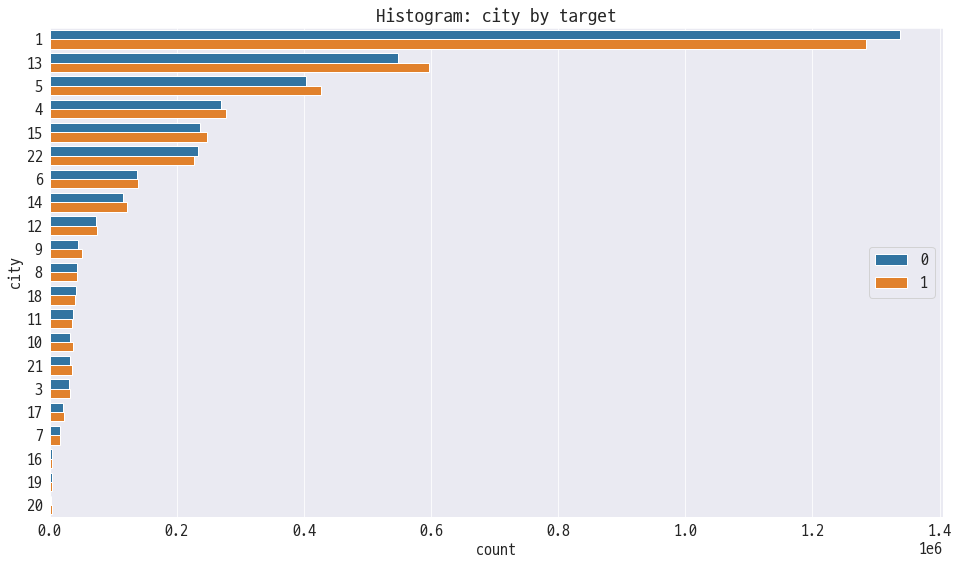

In [78]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=members_train_proc, order=members_train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: {} by target'.format(column))
plt.legend(loc='center right')
plt.show()

### column 2: bd <a id="7.2"></a>

In [79]:
column = 'bd'

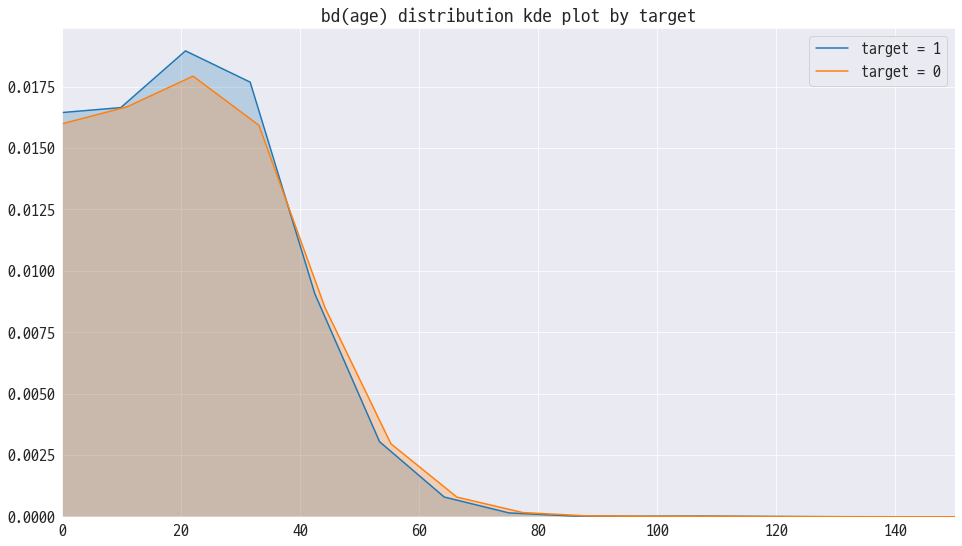

In [80]:
plt.figure(figsize=(16, 9))
sns.kdeplot(members_train_proc.loc[members_train_proc['target'] == 1, column], shade=True, bw=0.5, label='target = 1')
sns.kdeplot(members_train_proc.loc[members_train_proc['target'] == 0, column], shade=True, bw=0.5, label='target = 0')
plt.title('{}(age) distribution kde plot by target'.format(column))
plt.xlim([0, 150])
plt.legend()
plt.show()

### column 3: gender <a id="7.3"></a>

In [81]:
column = 'gender'

In [82]:
members_train_proc.groupby('target')[column].value_counts()

target  gender
0       male      1115674
        female    1043768
1       male      1181949
        female    1074548
Name: gender, dtype: int64

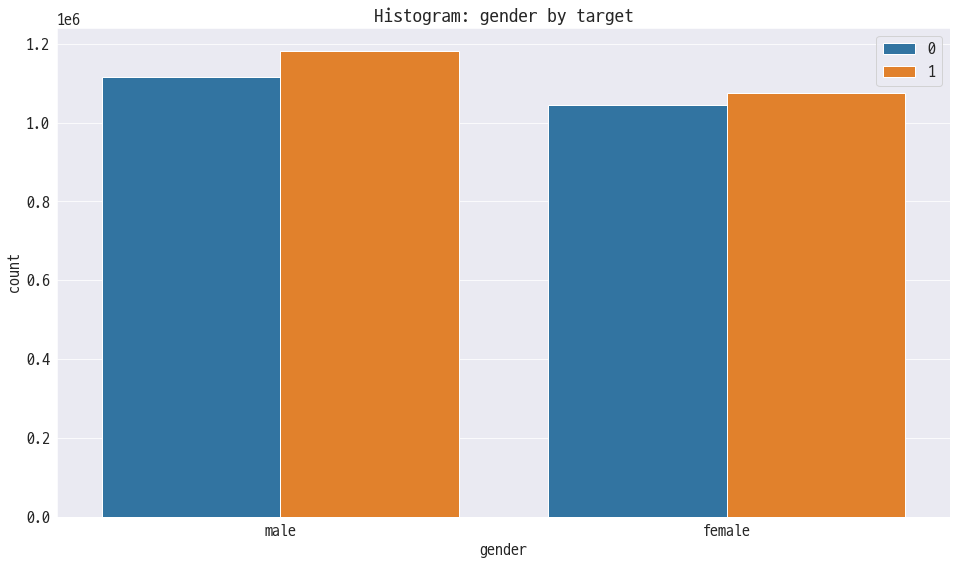

In [83]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=members_train_proc, order=members_train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: {} by target'.format(column))
plt.legend(loc='upper right')
plt.show()

### column 4: registered_via <a id="7.4"></a>

In [84]:
column = 'registered_via'

In [85]:
members_train_proc.groupby('target')[column].value_counts()

target  registered_via
0       9                 1380972
        7                 1261432
        3                  607793
        4                  404832
        13                   7733
1       9                 1433563
        7                 1290311
        3                  642997
        4                  340419
        13                   7366
Name: registered_via, dtype: int64

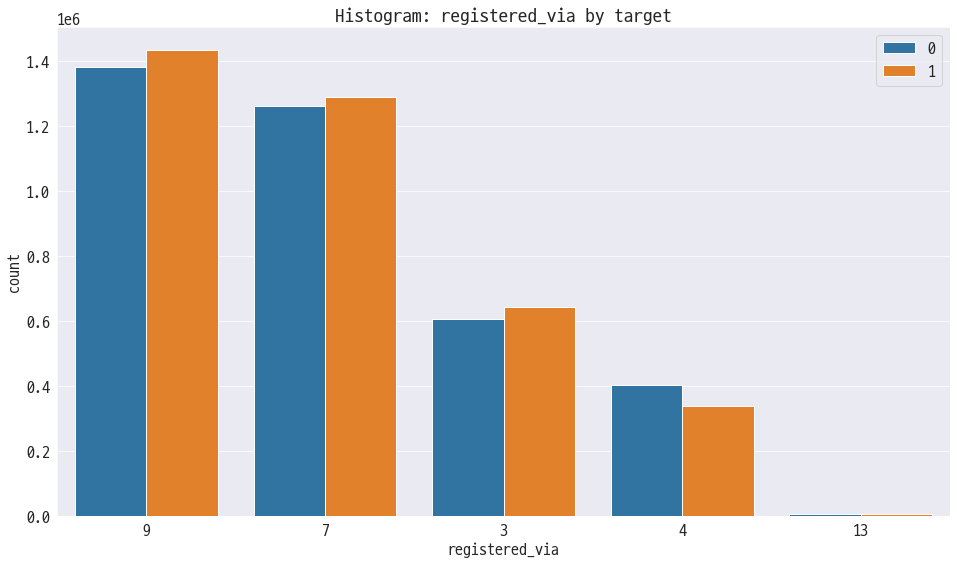

In [86]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=members_train_proc, order=members_train_proc[column].value_counts().index, hue='target')
plt.title('Histogram: {} by target'.format(column))
plt.legend(loc='upper right')
plt.show()

### column 5: registration_init_time_year <a id="7.5"></a>

In [87]:
column = 'registration_init_time_year'

In [88]:
members_train_proc.groupby('target')[column].value_counts()

target  registration_init_time_year
0       2016                           706383
        2015                           566968
        2011                           491281
        2013                           458349
        2014                           384395
        2012                           304873
        2010                           194975
        2007                           117279
        2008                            93314
        2006                            84918
        2017                            75449
        2009                            72788
        2005                            66405
        2004                            45385
1       2016                           674959
        2015                           613498
        2011                           494648
        2013                           482320
        2014                           419302
        2012                           303415
        2010                           18983

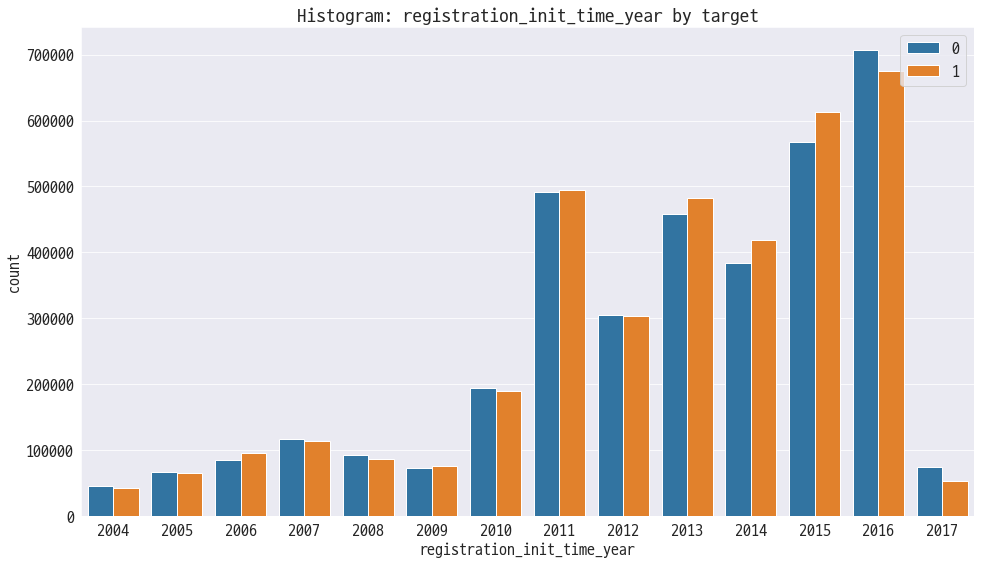

In [89]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=members_train_proc, hue='target')
plt.legend(loc='upper right')
plt.title('Histogram: {} by target'.format(column))
plt.show()

### column 6: expiration_date_year <a id="7.6"></a>

In [90]:
column = 'expiration_date_year'

In [91]:
members_train_proc.groupby('target')[column].value_counts()

target  expiration_date_year
0       2017                    3167191
        2018                     353519
        2016                     127497
        2015                       6551
        2019                       3655
        2013                       1250
        2014                        914
        2012                        613
        2020                        430
        2011                        335
        2008                        222
        2007                        208
        2004                        186
        2006                         71
        2005                         44
        2010                         43
        2009                         30
        1970                          3
1       2017                    3259493
        2018                     390898
        2016                      57335
        2019                       3020
        2015                       2463
        2013                        381
        202

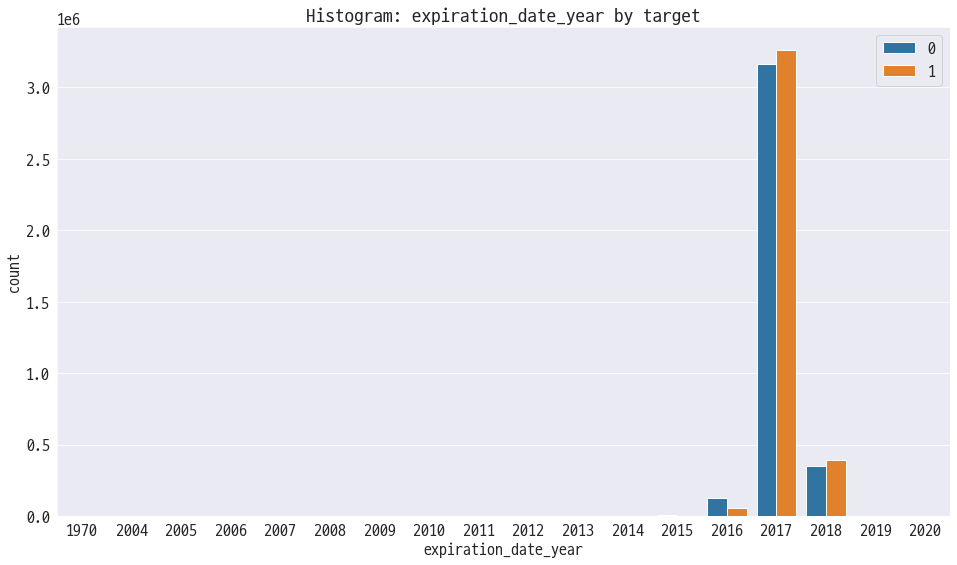

In [92]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=members_train_proc, hue='target')
plt.title('Histogram: {} by target'.format(column))
plt.legend(loc='upper right')
plt.show()

> There are not much influence by colunns in memebers.csv on target values in train.csv

<hr>

### Basic EDA: songs.csv <a id="8"></a>

In [93]:
songs_raw.describe(include='all')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,2296320,2.296320e+06,2202204,2296320,1224966,351052,2.296319e+06
unique,2296320,NaN,1045,222363,329823,110925,NaN
top,TBkr86tjLAsXwUnSr++oGYn8VwHl6o9ZxZutxK6sJ6A=,NaN,465,Various Artists,Neuromancer,Traditional,NaN
freq,1,NaN,567911,145916,17888,1751,NaN
mean,NaN,2.469935e+05,NaN,NaN,NaN,NaN,3.237800e+01
std,NaN,1.609200e+05,NaN,NaN,NaN,NaN,2.433241e+01
min,NaN,1.850000e+02,NaN,NaN,NaN,NaN,-1.000000e+00
25%,NaN,1.836000e+05,NaN,NaN,NaN,NaN,-1.000000e+00
50%,NaN,2.266270e+05,NaN,NaN,NaN,NaN,5.200000e+01
75%,NaN,2.772690e+05,NaN,NaN,NaN,NaN,5.200000e+01


In [94]:
songs_raw.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

### column 1: song_length <a id="8.1"></a>

In [95]:
column = 'song_length'

In [96]:
songs_raw[column].value_counts()

239908    1763
203964    1419
213995    1393
254955    1103
233221    1053
          ... 
238322       1
244465       1
219885       1
926890       1
8196         1
Name: song_length, Length: 146534, dtype: int64

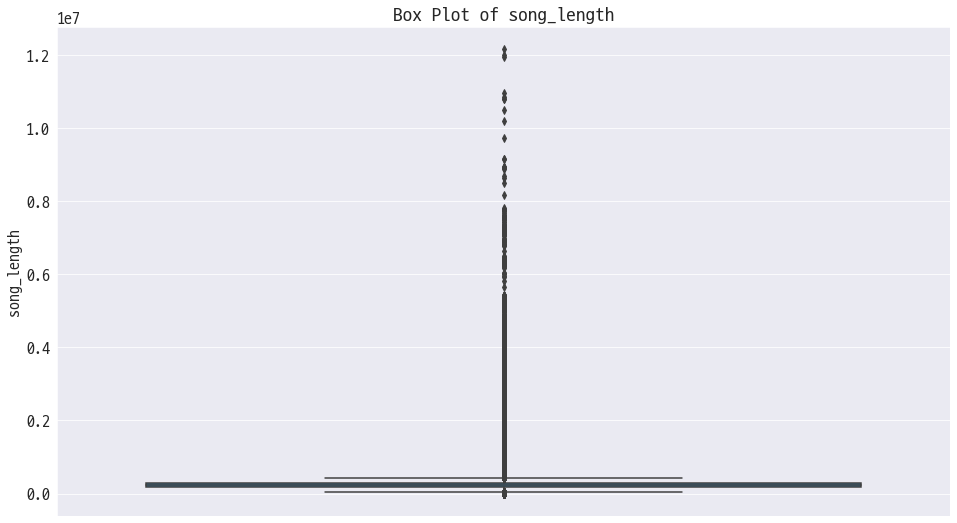

In [97]:
plt.figure(figsize=(16, 9))
sns.boxplot(y=column, data=songs_raw)
plt.title('Box Plot of {}'.format(column))
plt.show()

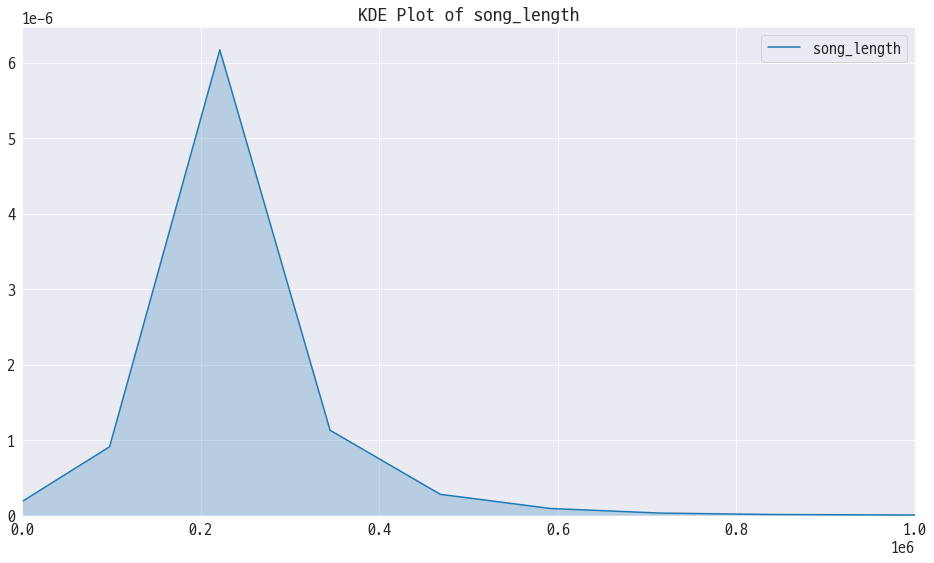

In [98]:
plt.figure(figsize=(16, 9))
sns.kdeplot(songs_raw[column], shade=True)
plt.title('KDE Plot of {}'.format(column))
plt.xlim([0, 1000000])
plt.show()

### column 2: genre_ids <a id="8.2"></a>

In [99]:
column = 'genre_ids'

In [100]:
songs_raw[column].value_counts()

465              567911
958              176349
2022             168870
1609             166457
2122             139938
                  ...  
1609|2130             1
275|2107|1572         1
465|921|2022          1
921|1955              1
1180|430              1
Name: genre_ids, Length: 1045, dtype: int64

In [101]:
song_genre_dict = {'song_id': list(), 'genre_id': list()}
for idx, genres in tqdm(enumerate(songs_raw[column])):
    if not pd.isna(genres):
        for genre in genres.split('|'):
            song_genre_dict['song_id'].append(songs_raw.loc[idx, 'song_id'])
            song_genre_dict['genre_id'].append(genre)
    else:
        song_genre_dict['song_id'].append(songs_raw.loc[idx, 'song_id'])
        song_genre_dict['genre_id'].append(np.nan)

song_genre_df = pd.DataFrame(song_genre_dict)

2296320it [00:48, 47758.35it/s]


In [102]:
column = 'genre_id'

In [103]:
song_genre_df[column].value_counts()

465     589220
958     182836
1609    177258
2022    176531
2122    149608
         ...  
2002         5
2175         5
324          2
2163         1
1970         1
Name: genre_id, Length: 191, dtype: int64

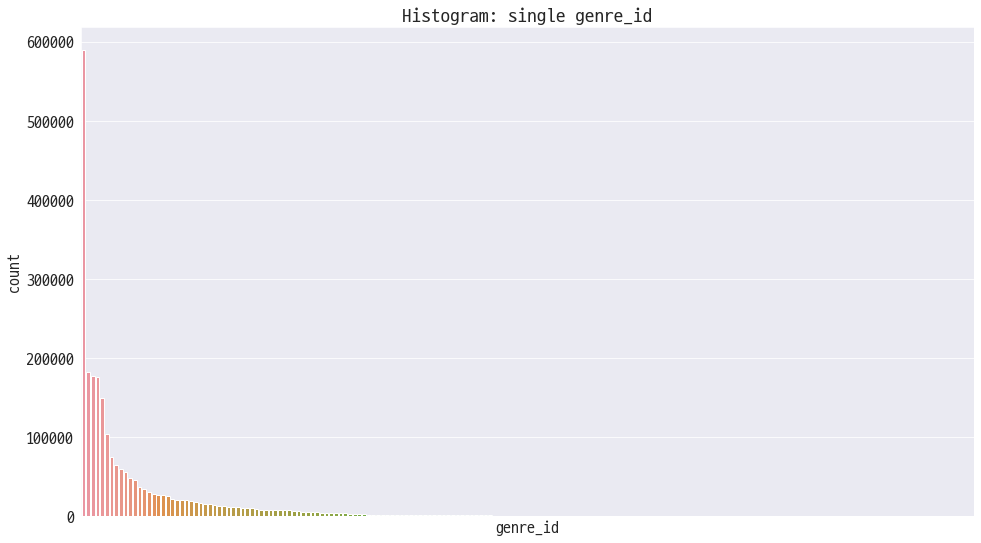

In [104]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=song_genre_df, order=song_genre_df[column].value_counts().index)
plt.title('Histogram: single {}'.format(column))
plt.xticks([])
plt.show()

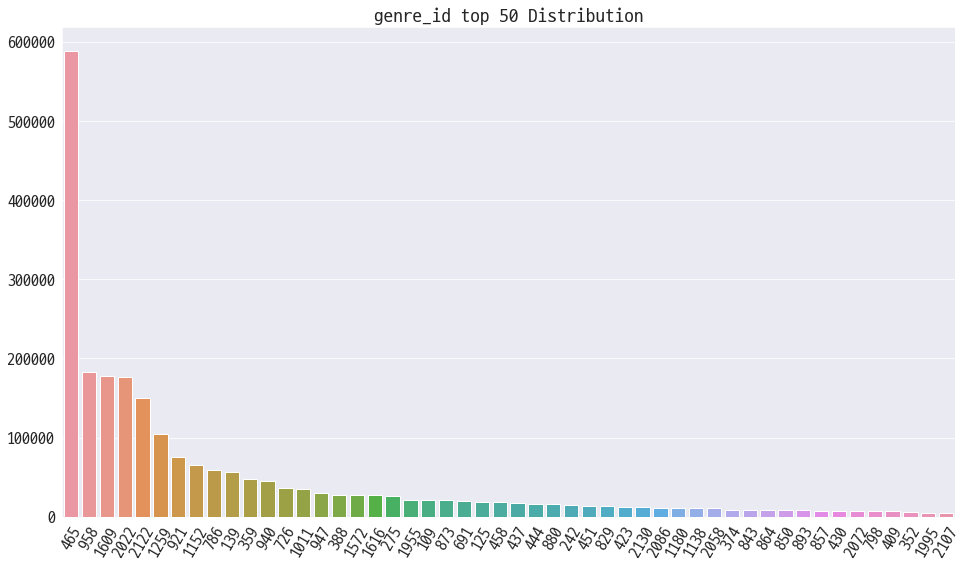

In [105]:
genre_id_top_50 = song_genre_df[column].value_counts()[:50]
plt.figure(figsize=(16, 9))
sns.barplot(x=genre_id_top_50.index, y=genre_id_top_50.values, order=list(genre_id_top_50.index))
plt.title('{} top 50 Distribution'.format(column))
plt.xticks(rotation=60)
plt.show()

### column 3: artist_name <a id="8.3"></a>

In [106]:
column = 'artist_name'

In [107]:
songs_raw[column].value_counts()

Various Artists                145916
証聲音樂圖書館 ECHO MUSIC              11276
Billy Vaughn                     4828
รวมศิลปิน                        4432
Richard Clayderman               4180
                                ...  
Monique Holden                      1
La Scala String Quartet             1
Gakki                               1
Andy Williams| Paul & Paula         1
All Natural                         1
Name: artist_name, Length: 222363, dtype: int64

In [108]:
songs_raw[column].value_counts()[:10]

Various Artists       145916
証聲音樂圖書館 ECHO MUSIC     11276
Billy Vaughn            4828
รวมศิลปิน               4432
Richard Clayderman      4180
Elvis Presley           4038
Nat King Cole           3806
Billie Holiday          3674
Frank Sinatra           3594
Armin van Buuren        2818
Name: artist_name, dtype: int64

/Users/dhsong/Workspaces/Kaggle Projects/kaggle-kkbox-music-recommendation-challenge/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dhsong/Workspaces/Kaggle Projects/kaggle-kkbox-music-recommendation-challenge/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dhsong/Workspaces/Kaggle Projects/kaggle-kkbox-music-recommendation-challenge/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dhsong/Workspaces/Kaggle Projects/kaggle-kkbox-music-recommendation-challenge/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Us

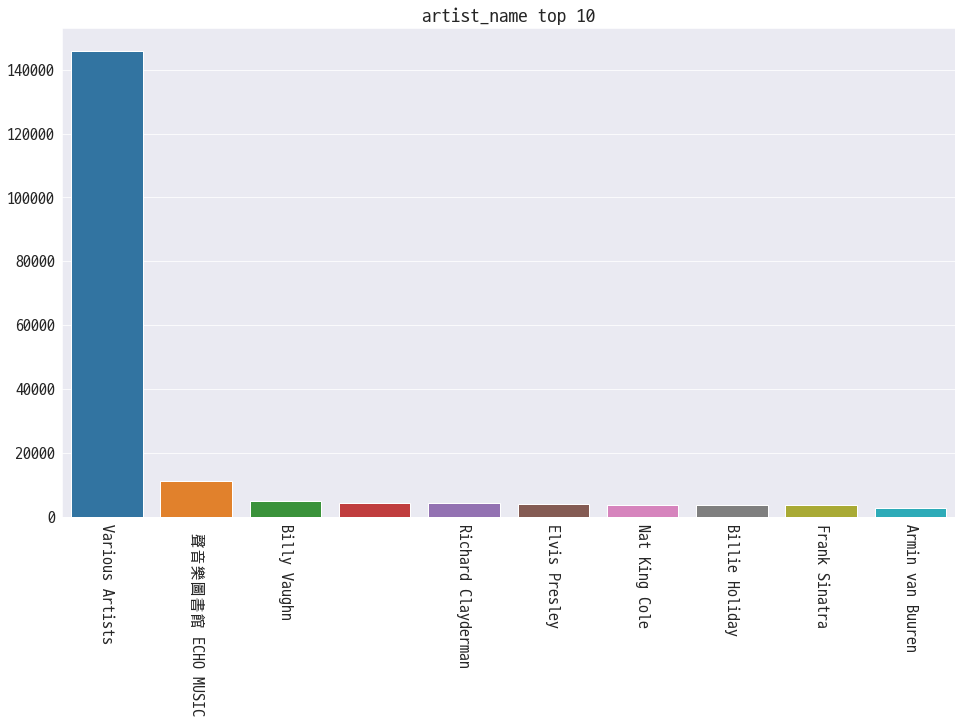

In [109]:
artist_name_top10 = songs_raw[column].value_counts()[:10]
plt.figure(figsize=(16, 9))
sns.barplot(x=artist_name_top10.index, y=artist_name_top10.values, order=list(artist_name_top10.index))
plt.title('{} top 10'.format(column))
plt.xticks(rotation=270)
plt.show()

### column 4: composer <a id="8.4"></a>

In [110]:
column = 'composer'

In [111]:
songs_raw[column].value_counts()

Neuromancer                                                    17888
Johann Sebastian Bach                                          12105
Wolfgang Amadeus Mozart                                        10839
Marco Rinaldo                                                  10803
Traditional                                                    10105
                                                               ...  
Lutile／kuro                                                        1
Hirose Ryohei                                                      1
Daniel Carreño González                                            1
Otto van Gemert| Timothy van der Holst                             1
Thierry Bellia| Alex Longo| Thierry Bellia| Alexandre Longo        1
Name: composer, Length: 329823, dtype: int64

In [112]:
songs_raw[column].value_counts()[:10]

Neuromancer                17888
Johann Sebastian Bach      12105
Wolfgang Amadeus Mozart    10839
Marco Rinaldo              10803
Traditional                10105
Ludwig van Beethoven        7290
佚名                          6259
Sacchetto G.                5479
Frédéric Chopin             5468
Antonio Vivaldi             3376
Name: composer, dtype: int64

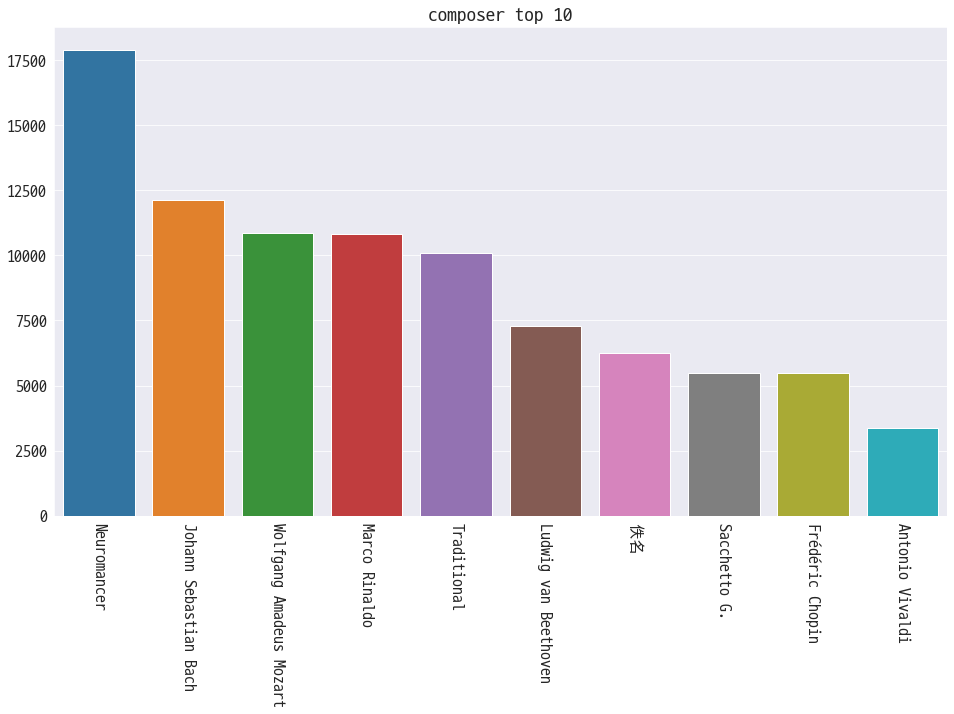

In [113]:
composer_top10 = songs_raw[column].value_counts()[:10]
plt.figure(figsize=(16, 9))
sns.barplot(x=composer_top10.index, y=composer_top10.values, order=list(composer_top10.index))
plt.title('{} top 10'.format(column))
plt.xticks(rotation=270)
plt.show()

### column 5: lyricist <a id="8.5"></a>

In [114]:
column = 'lyricist'

In [115]:
songs_raw[column].value_counts()

Traditional                                               1751
―                                                         1530
林夕                                                        1015
Michael Ruland                                             832
Lin Xi                                                     671
                                                          ... 
陳佩瑜                                                          1
Jonas Bounouhi                                               1
M. Pokora|M. Pokora                                          1
Calum MacColl| Samuel Martyn Barker| Sarah Jane Morris       1
Manuel Quijano| Manolo Quijano                               1
Name: lyricist, Length: 110925, dtype: int64

In [116]:
songs_raw[column].value_counts()[:10]

Traditional       1751
―                 1530
林夕                1015
Michael Ruland     832
Lin Xi             671
Dieter Bohlen      660
李岩修                633
黃偉文                626
姚若龍                529
幼福文化               481
Name: lyricist, dtype: int64

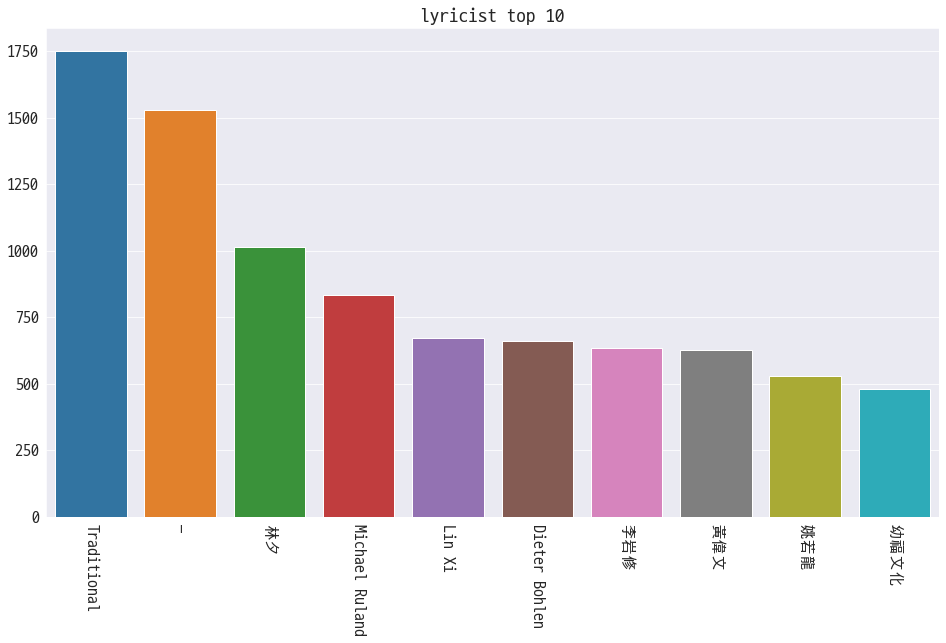

In [117]:
lyricist_top10 = songs_raw[column].value_counts()[:10]
plt.figure(figsize=(16, 9))
sns.barplot(x=lyricist_top10.index, y=lyricist_top10.values, order=list(lyricist_top10.index))
plt.title('{} top 10'.format(column))
plt.xticks(rotation=270)
plt.show()

### column 6: language <a id="8.6"></a>

In [118]:
column = 'language'

In [119]:
songs_raw[column].value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

**<br>language == -1 is not classified data**

In [120]:
songs_raw.loc[songs_raw['language'] == -1].head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
12,fAZLdfQaLG76a6Ei4alt1eSjBM9rshQkiQEC6+n+y08=,180871,726,Littlesong,Michael William Balfe,NaN,-1.0
18,JcHIgDP5ivyqYIn7RxfXM13eWwOzcoxkWosSauz6RbU=,374027,726,White Noise,NaN,NaN,-1.0
28,+dOlHQGlsiHPbG1cMYsoFVsAi05YgsGfeEzsdS16yec=,368441,1609,Marvin Gaye & Kygo,Marvin Gaye| Odell Brown| David Ritz,Marvin Gaye| Odell Brown| David Ritz,-1.0
44,/pNJtPeT5RixL9cwAScQ83XG6lzNjQbxXdz9Bxm3UCk=,954851,873,蘇曼竹巴仁波切,公版,公版,-1.0
54,vLLKr+iN+vepbTD6W2kDXHvuqmGiXGdXRRHLjRp0pCQ=,300257,873,原力歌手,王苒馨,公版,-1.0


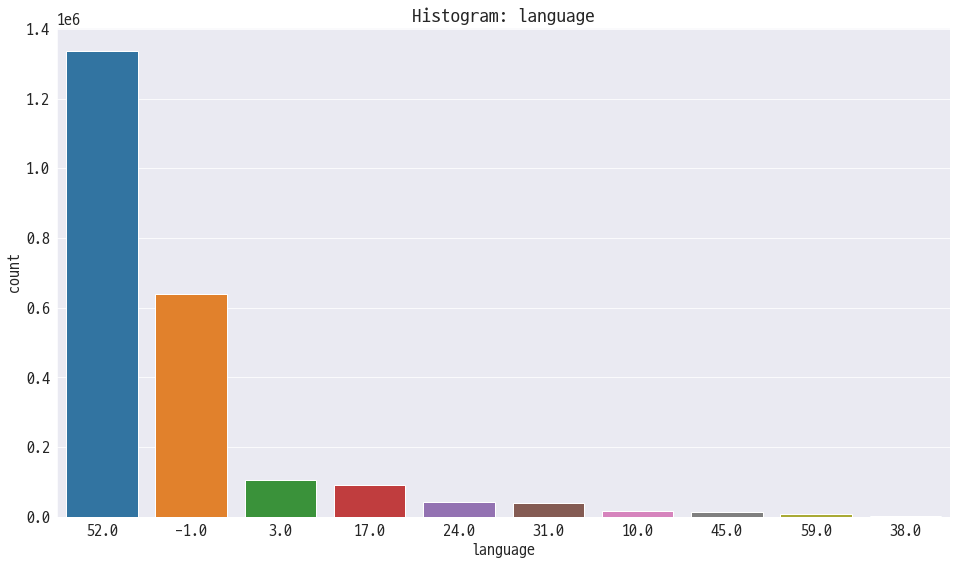

In [121]:
plt.figure(figsize=(16, 9))
sns.countplot(column, data=songs_raw, order=songs_raw[column].value_counts().index)
plt.title('Histogram: {}'.format(column))
plt.show()

<hr>

### EDA: songs.csv + train.csv <a id="9"></a>

In [122]:
songs_train_proc = pd.merge(left=songs_raw, right=train_proc, on='song_id')
song_genre_train_proc = pd.merge(left=song_genre_df, right=train_proc, on='song_id')

### column 1: song_length <a id="9.1"></a>

In [123]:
column = 'song_length'

In [124]:
songs_train_proc.groupby('target')[column].value_counts()

target  song_length
0       258298         6802
        258403         6707
        235415         6430
        245446         6348
        250357         6216
                       ... 
1       8679526           1
        9146340           1
        10799972          1
        10800065          1
        10851706          1
Name: song_length, Length: 98288, dtype: int64

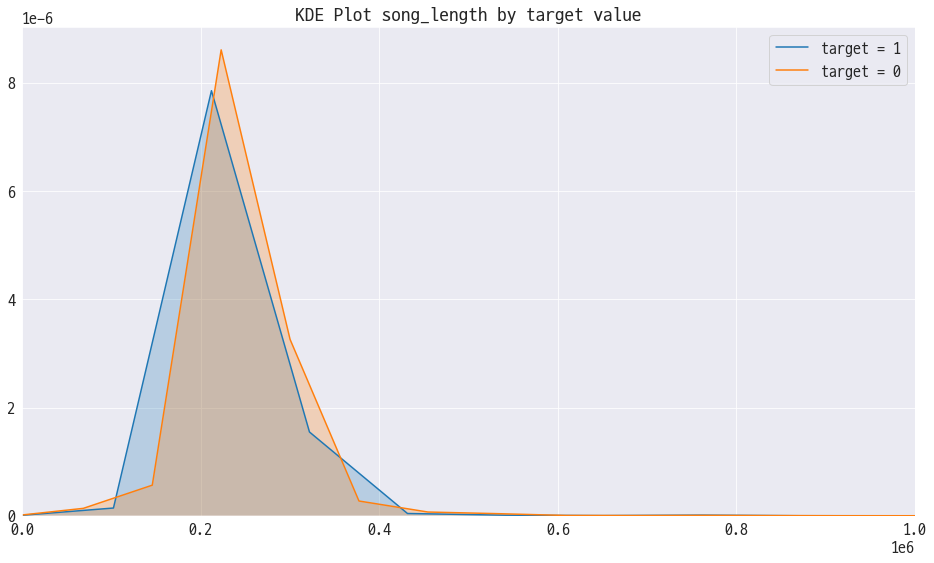

In [125]:
plt.figure(figsize=(16, 9))
sns.kdeplot(songs_train_proc.loc[songs_train_proc['target'] == 1, column], shade=True, label='target = 1')
sns.kdeplot(songs_train_proc.loc[songs_train_proc['target'] == 0, column], shade=True, label='target = 0')
plt.title('KDE Plot {} by target value'.format(column))
plt.xlim([0, 1000000])
plt.legend(loc='upper right')
plt.show()

### column 2: genre_id(s) <a id="9.2"></a>

In [126]:
column = 'genre_id'

In [127]:
song_genre_train_proc.groupby('target')[column].value_counts()

target  genre_id
0       465         1891795
        458          593251
        921          203420
        1609         180995
        444          139399
                     ...   
1       1187              1
        1266              1
        2008              1
        296               1
        338               1
Name: genre_id, Length: 315, dtype: int64

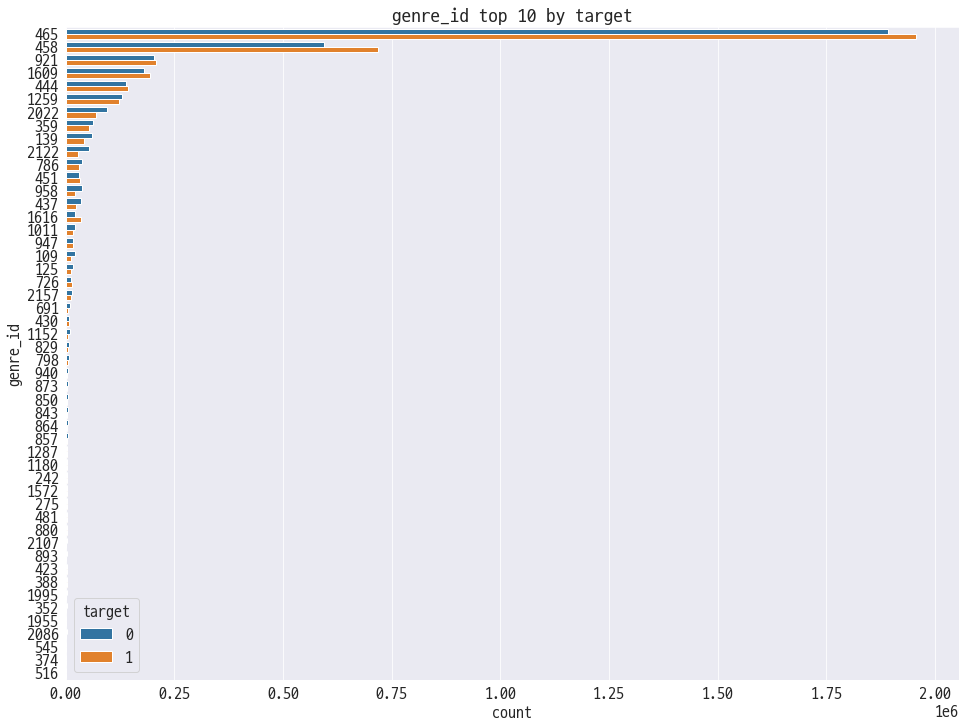

In [128]:
genre_top50 = list(song_genre_train_proc[column].value_counts()[:50].index)
plt.figure(figsize=(16, 12))
sns.countplot(y=column, data=song_genre_train_proc.loc[song_genre_train_proc[column].isin(genre_top50)], order=genre_top50, hue='target')
plt.title('{} top 10 by target'.format(column))
plt.show()

### column 3: language <a id="9.3"></a>

In [129]:
column = 'language'

In [130]:
songs_train_proc.groupby('target')[column].value_counts()

target  language
0        3.0        1912584
         52.0        967083
         31.0        315763
        -1.0         179110
         17.0        147951
         10.0         93405
         24.0         43167
         59.0          2040
         45.0          1448
         38.0           125
1        3.0        2132059
         52.0        897706
         31.0        340860
        -1.0         129642
         17.0         97185
         10.0         78499
         24.0         35454
         59.0          2153
         45.0           949
         38.0            85
Name: language, dtype: int64

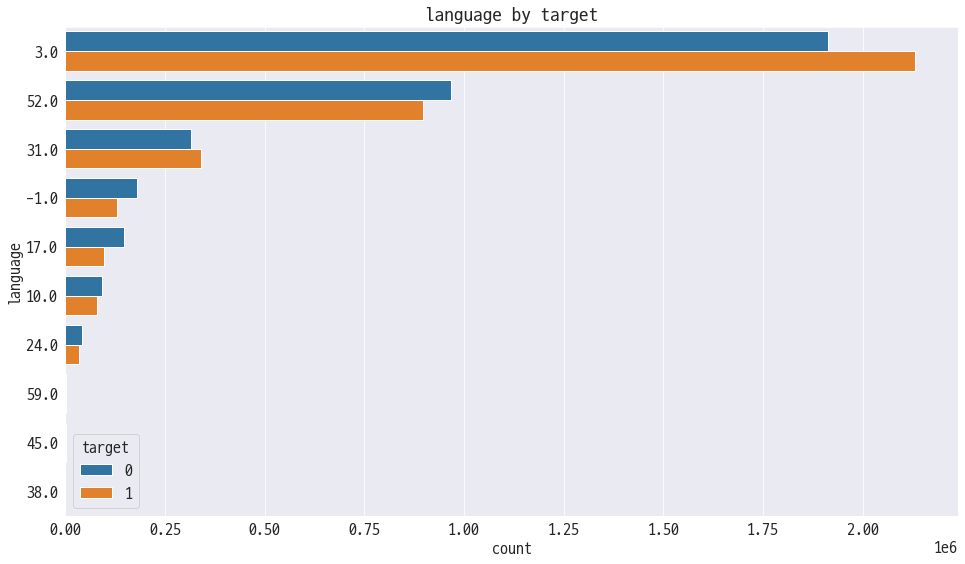

In [131]:
plt.figure(figsize=(16, 9))
sns.countplot(y=column, data=songs_train_proc, hue='target', order=songs_train_proc[column].value_counts().index)
plt.title('{} by target'.format(column))
plt.show()

**overall, not much influence on train.csv by songs.csv only**

<hr>

### Imputation on songs.csv <a id="10"></a>

In [132]:
songs_proc = songs_raw.copy()

### column langauge <a id="10.1"></a>

In [133]:
songs_proc

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [134]:
songs_proc.loc[songs_proc['language'].isna()]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
605127,nMZ7IRARPBit0ZGegNfecsx77LQSpH2ZY93vyd5xRy0=,178654,444,JONGHYUN,Korean Lyrics by Kim| Jong Hyun / Lee| Yoon Se...,31,NaN


In [135]:
songs_proc['language'] = songs_proc['language'].fillna(31)

In [136]:
songs_proc.loc[songs_proc['song_id'] == 'nMZ7IRARPBit0ZGegNfecsx77LQSpH2ZY93vyd5xRy0=']

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
605127,nMZ7IRARPBit0ZGegNfecsx77LQSpH2ZY93vyd5xRy0=,178654,444,JONGHYUN,Korean Lyrics by Kim| Jong Hyun / Lee| Yoon Se...,31,31.0


<hr>

### save processed dataset <a id="11"></a>

1. memebers.csv: date is splitted to year, month, day
2. songs.csv: langauge is imputes
3. song_genre.csv: single song & sing genre pair.
4. train.csv: REMOVED value added
5. test.csv: REMOVED value added
6. members_songs_train: merge members.csv, songs.csv, and train.csv. For member.csv and songs.csv some columns are dropped
7. members_songs_train: merge members.csv, songs.csv, and test.csv. For member.csv and songs.csv some columns are dropped

### processed members <a id="11.1"></a>

In [137]:
members_proc.to_csv('../data/processed/members.csv', index=False)
members_proc

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011,08,20,2017,09,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2015,06,28,2017,06,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2016,04,11,2017,07,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,2015,09,06,2015,09,07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,2017,01,26,2017,06,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910,2013,11,11,2017,09,10
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518,2014,10,24,2017,05,18
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908,2013,08,02,2017,09,08
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920,2015,10,20,2017,09,20


### processed songs <a id="11.2"></a>

In [138]:
songs_proc.to_csv('../data/processed/songs.csv', index=False)
songs_proc

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [139]:
song_genre_df.to_csv('../data/processed/song_genre.csv', index=False)
song_genre_df

,song_id,genre_id
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,465
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,444
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,465
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,465
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,726
...,...,...
2514691,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,958
2514692,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,465
2514693,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,1609
2514694,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,465


### processed train and test <a id="11.3"></a>

In [140]:
train_proc.to_csv('../data/processed/train.csv', index=False)
train_proc


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,REMOVED,REMOVED,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,REMOVED,REMOVED,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,REMOVED,REMOVED,REMOVED,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,REMOVED,REMOVED,REMOVED,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,REMOVED,online-playlist,1


In [141]:
test_proc.to_csv('../data/processed/test.csv', index=False)
test_proc

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,REMOVED,REMOVED
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,REMOVED,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,REMOVED,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,REMOVED,online-playlist


**members.csv**<br>
1. msno (save)
2. city (save)
3. bd (delete): outlier values
4. gender (delete): missing values
5. registerd_via (save)
6. registration_init_time (delete): only save year
7. expiration_date (delete): only save year
8. registration_init_time_year (save) registration_init_time_month (delete) registration_init_time_day (delete)
9. expiration_date_year (save) expiration_date_month (delete) expiration_date_day (delete)

In [142]:
columns = ['bd', 'gender', 'registration_init_time', 'expiration_date', 'registration_init_time_month', 'registration_init_time_day', 'expiration_date_month', 'expiration_date_day']
members_proc.drop(axis=1, columns=columns, inplace=True)
members_proc

,msno,city,registered_via,registration_init_time_year,expiration_date_year
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,7,2011,2017
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,7,2015,2017
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,4,2016,2017
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,9,2015,2015
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,4,2017,2017
...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,7,2013,2017
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,3,2014,2017
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,7,2013,2017
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,7,2015,2017


In [143]:
members_train = pd.merge(left=members_proc, right=train_proc, on='msno')
members_test = pd.merge(left=members_proc, right=test_proc, on='msno')

**songs.csv**<br>
1. song_id (save)
2. song_length (save)
3. genre_ids (save): outlier values
4. artist_name (delete): invalid form
5. composer (delete): missing values
6. lyricist (delete): missing values
7. language (save)

In [144]:
columns = ['artist_name', 'composer', 'lyricist']
songs_proc.drop(axis=1, columns=columns, inplace=True)
songs_proc

,song_id,song_length,genre_ids,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,52.0
...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,52.0


In [145]:
members_songs_train = pd.merge(left=songs_proc, right=members_train, on='song_id')
members_songs_test = pd.merge(left=songs_proc, right=members_test, on='song_id')

In [146]:
members_songs_train.to_csv('../data/processed/members_songs_train.csv', index=False)
members_songs_train

,song_id,song_length,genre_ids,language,msno,city,registered_via,registration_init_time_year,expiration_date_year,source_system_tab,source_screen_name,source_type,target
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,1,7,2011,2017,my library,Online playlist more,online-playlist,1
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,FUkdXwJsj5OqGMEDWBjmEmtINMrCZUI/oP1vD5R/IBg=,13,9,2007,2017,my library,Local playlist more,local-playlist,0
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,vTSR+ATZGttgoU1P86qWLEWad4h4WnDaaXoTYPy+50M=,12,9,2006,2017,my library,Local playlist more,local-playlist,1
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,5N6c4iwAy2BLA+NV9UEAGjd7eg4LlJFm1wOu9MfK8qw=,5,3,2013,2019,my library,Local playlist more,local-playlist,0
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,SV/kDj7lN/jwIxXUGa35vuMplnh8Rl2TsmZPm6M0q30=,15,9,2016,2017,my library,Local playlist more,local-library,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377299,UzwJe62Lpb9wW6/I1tsu967cx3kcRl7pwkp4TmxnOew=,156410,958,-1.0,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,13,9,2006,2017,discover,REMOVED,REMOVED,0
7377300,cf+3RAbsfu7v0rRVAXc+1BdbxnR0FqACRr9Cnn3nm+c=,310308,1609,52.0,rUA3gSrSRvhrRhTbi3kweZ0jV1WaVPbH853m+aEAUwI=,1,7,2011,2017,REMOVED,REMOVED,REMOVED,0
7377301,Yk0z6TW+APnYkIkBR5D9wUDQjOyzpdAFsN81F49FCyc=,218618,465,52.0,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,1,7,2016,2017,my library,REMOVED,REMOVED,0
7377302,QLPe0TmxFtDC3NmTep3GZE9Ewmw2Yevv/UkLo/Zt6DA=,360176,1609,52.0,luusCpzJNvK1VeEQyyqvTHud48A/QSOuoiJE7NtvrRI=,13,9,2015,2017,my library,REMOVED,REMOVED,0


In [147]:
members_songs_test.to_csv('../data/processed/members_songs_test.csv', index=False)
members_songs_test

,song_id,song_length,genre_ids,language,msno,city,registered_via,registration_init_time_year,expiration_date_year,id,source_system_tab,source_screen_name,source_type
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,FJppumJ2//DwP+873wPo8psWlwRLrxmfNdRIPLCgH1E=,1,7,2011,2017,2214660,my library,Local playlist more,local-library
1,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,NZ82fmgCMRTIh1U83eSmyL2BmoKZwEPeuZ0u+PKE0as=,10,7,2010,2017,348199,discover,Online playlist more,online-playlist
2,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,Tr2Lb0GEN45KWQ00c5oTsA4vWQq//VZKfsYV5CKFdmY=,13,3,2013,2017,258358,discover,Online playlist more,online-playlist
3,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,9wtmRueAD3kUN5tdATkYn6Ib+95izC8XQ8Tfdt9CTnA=,1,7,2015,2017,481866,my library,REMOVED,REMOVED
4,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,3.0,PFDtXphGre9ostqRqQJyRtok8+6zKzHSswRQjGJqiYc=,1,7,2011,2017,1798568,my library,Local playlist more,local-playlist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556760,RhAj/LPmrqtq+agGMRdCrUvCA2LiKtkvejkmy+pX9Lo=,192679,1152,-1.0,oNeK+4aUfZ4nVgOurQpuUikMKMsKWcghL5MBqeR9lN0=,1,7,2013,2017,1841743,my library,REMOVED,REMOVED
2556761,5rdqvzoU7P9n24p6LpQqXPXCfI48xEJINBKfWs5CWlw=,73514,1152,-1.0,NwX1NaVlyw0jvfQNxLTcx9ztIUKVL/sjkccdAmMpfCA=,1,4,2016,2017,1888599,discover,REMOVED,REMOVED
2556762,JCGInJu0WP/TCoa9W4TMXv2k90VLVY2fxfjh44P/ERg=,222934,921,52.0,XHJRZV5Xgcub4dNGuzRj5tVfDD1iwrtoXmdQOWtlc3U=,1,9,2016,2017,954264,REMOVED,REMOVED,REMOVED
2556763,kJhOwg/nJaXiy6aMil9Rz+hMyg3/rU9JjrnpqPwg+xc=,325067,465,52.0,bbreMohQEEVr9cdJZ4k06eJ5e1Aq64Kq4FVksv+J+1Q=,16,3,2013,2017,1879018,my library,Local playlist more,local-library
